In [1]:
from IPython.display import display_markdown
from xray_fov.paths import paths, outs, data_path_alex
from xray_fov.data.dicom import dicom_directory
from xray_fov.data.image import image_directory
from xray_fov.plot.histogram_matching import plot_histogram_matching
from skimage.exposure import match_histograms
import numpy as np

import matplotlib as mpl
mpl.rcParams["axes.titlesize"] = mpl.rcParams["axes.labelsize"]

In [2]:
sources = {
    #"phantom-alex (high)" : dicom_directory(paths["dicom"]["phantom-alex"])[-1]["grayscale"],
    #"phantom (high)" : dicom_directory(paths["dicom"]["phantom"])[-1]["grayscale"],
    "real_image (train)" : image_directory(paths["nn"]["train-images"], preload=False)[0]["grayscale"],
}

In [3]:
references = {
    "phantom-alex (low)" : dicom_directory(paths["dicom"]["phantom-alex"])[0]["grayscale"],
    "phantom (low)" : dicom_directory(paths["dicom"]["phantom"])[0]["grayscale"],
    "normal distribution" : np.random.normal(120, 10, image_directory(paths["nn"]["train-images"], preload=False)[0]["grayscale"].shape).astype(int),
}

In [4]:
noises = {
    "None (identity)" : lambda x : x,
    "Gaussian" : lambda x : x + np.random.normal(0, 5, x.shape),
    "Poisson" : lambda x : np.random.poisson(x),
    #"Poisson + Gaussian" : lambda x : np.random.poisson(x) + np.random.normal(0, 5, x.shape),
    #"Poisson (inv)" : lambda x : x.max()-np.random.poisson(x.max()-x+x.min())+x.min(),
    #"Poisson (inv) + Gaussian" : lambda x : x.max()-np.random.poisson(x.max()-x+x.min())+x.min() + np.random.normal(0, 0.5, x.shape),
}

# real_image (train) / phantom-alex (low) / None (identity)

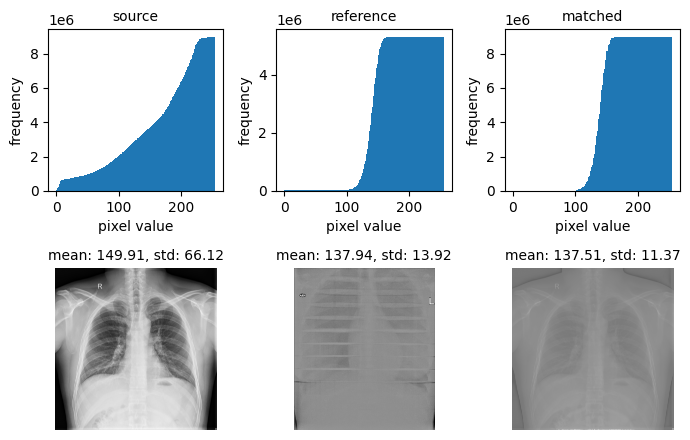

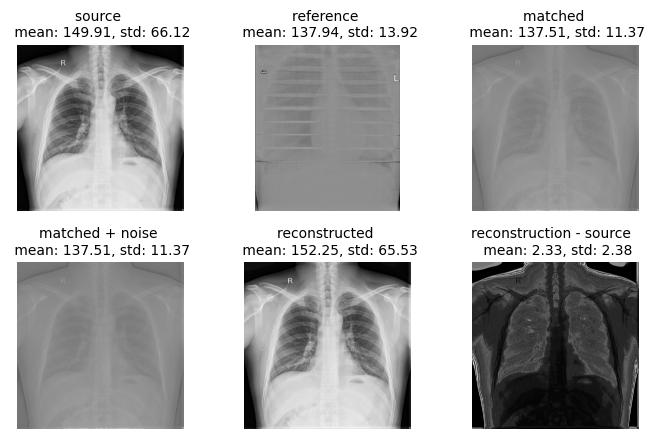

# real_image (train) / phantom-alex (low) / Gaussian

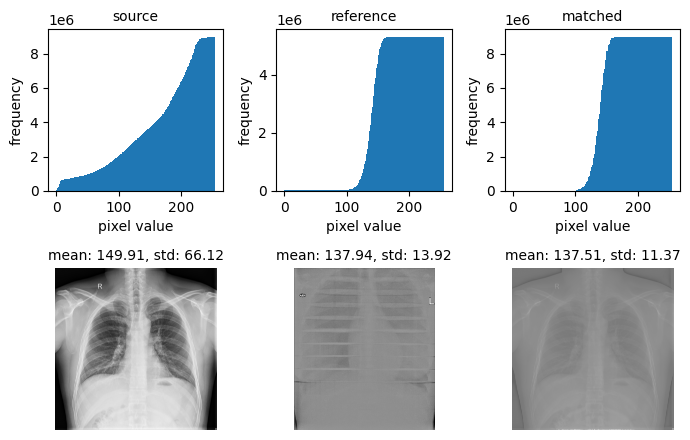

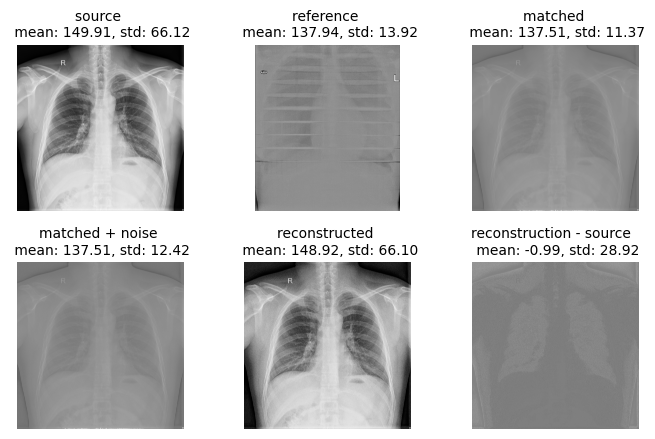

# real_image (train) / phantom-alex (low) / Poisson

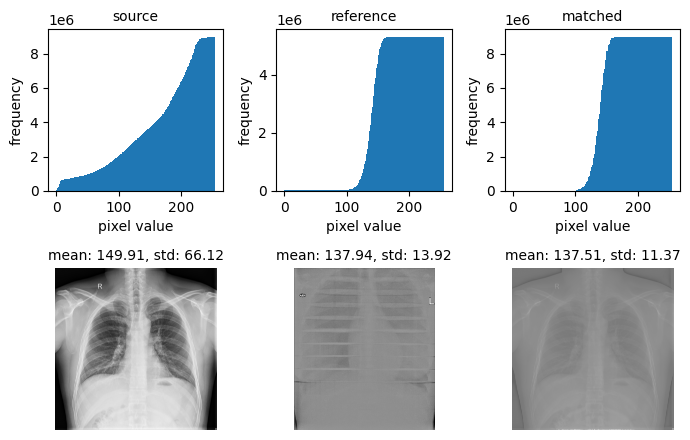

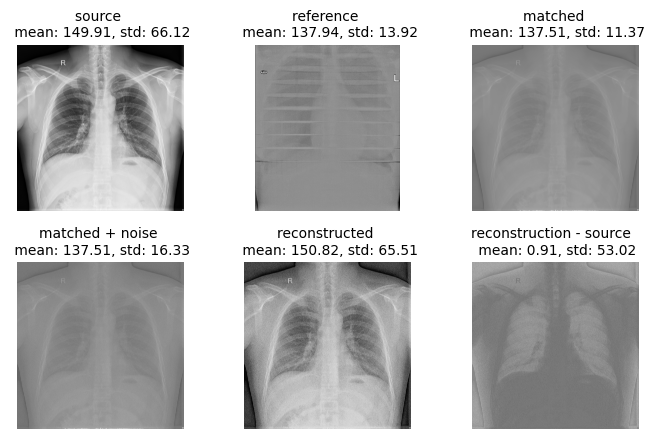

# real_image (train) / phantom (low) / None (identity)

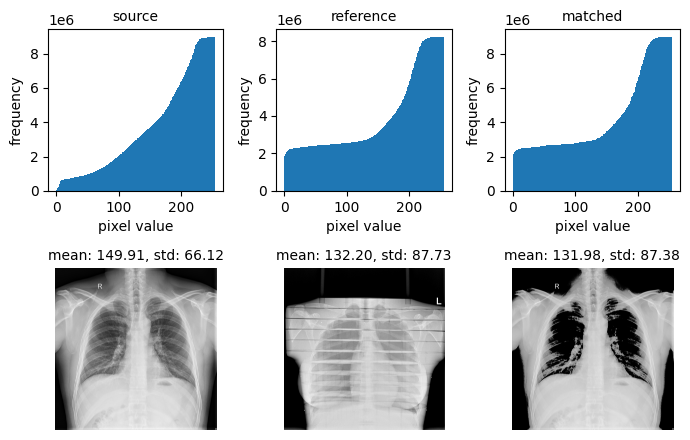

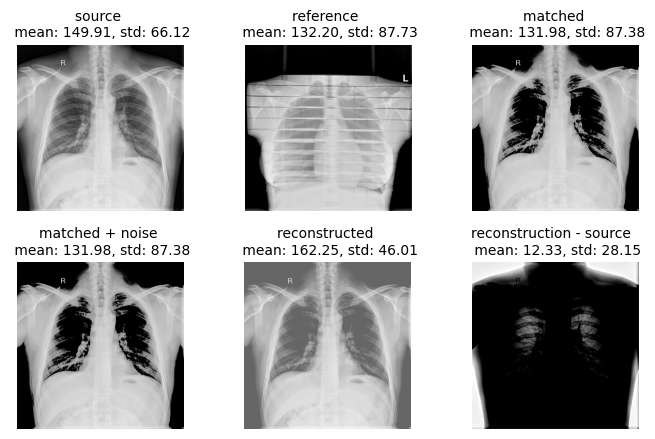

# real_image (train) / phantom (low) / Gaussian

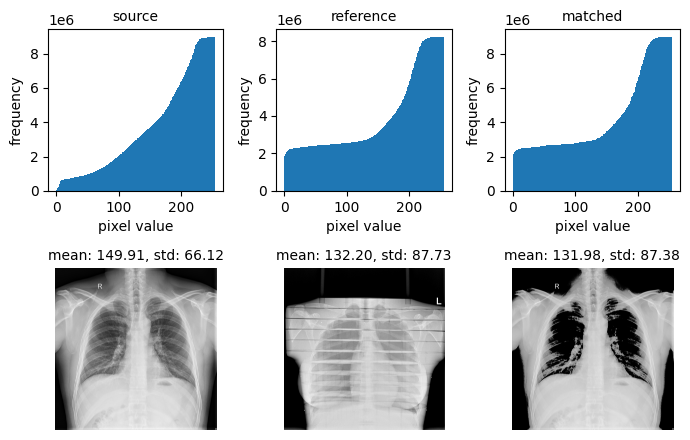

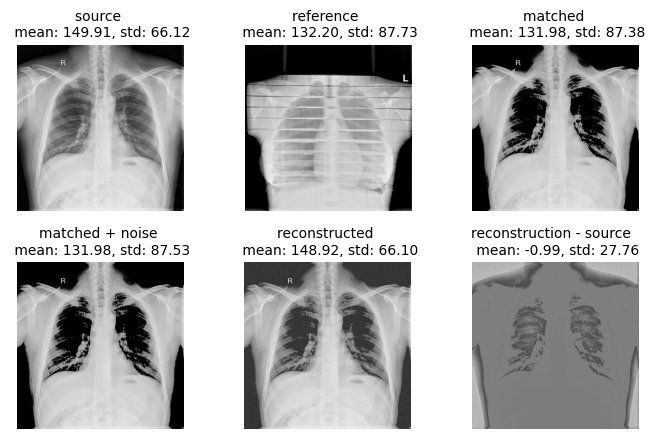

# real_image (train) / phantom (low) / Poisson

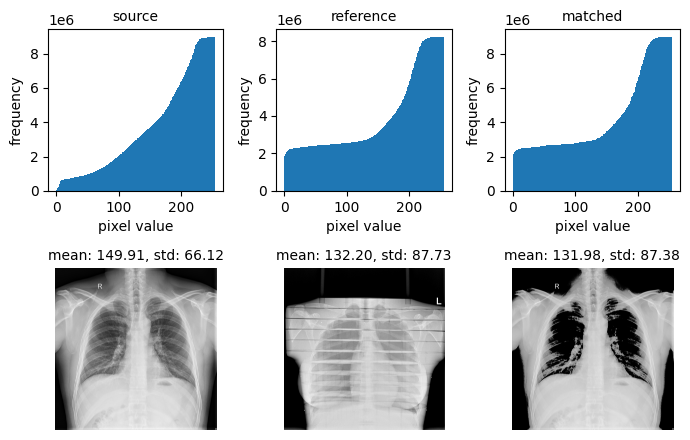

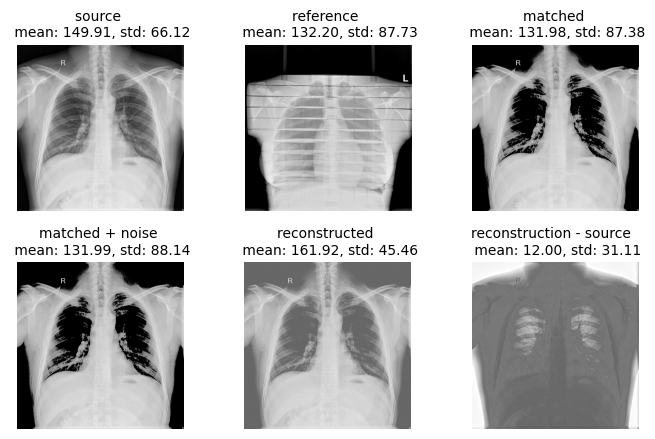

# real_image (train) / normal distribution / None (identity)

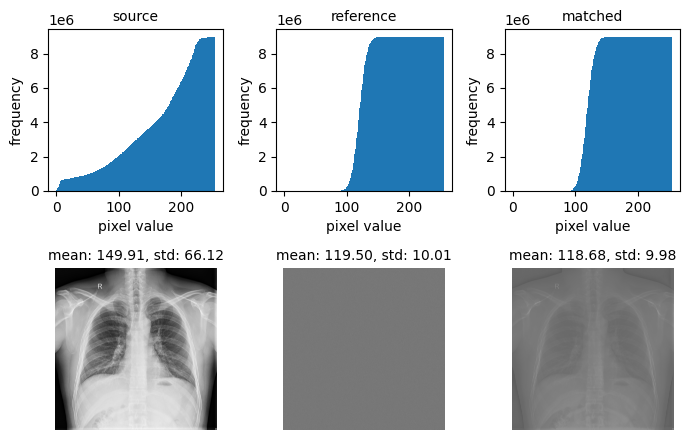

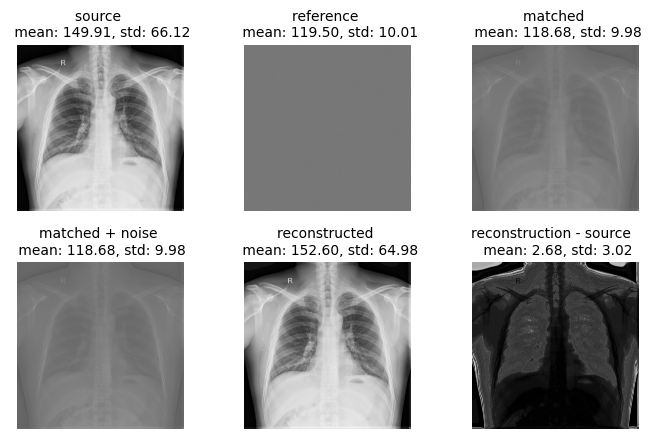

# real_image (train) / normal distribution / Gaussian

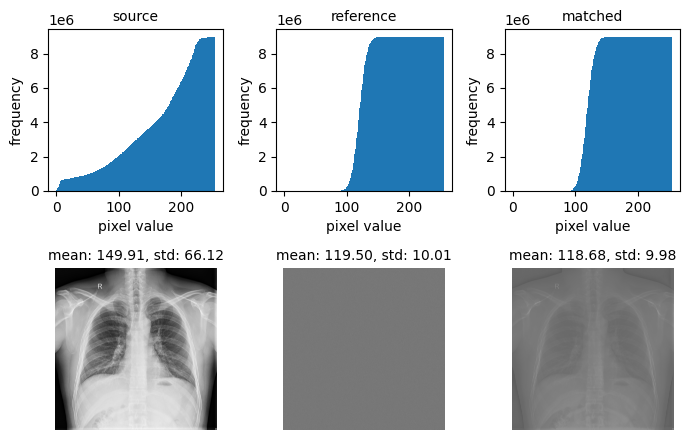

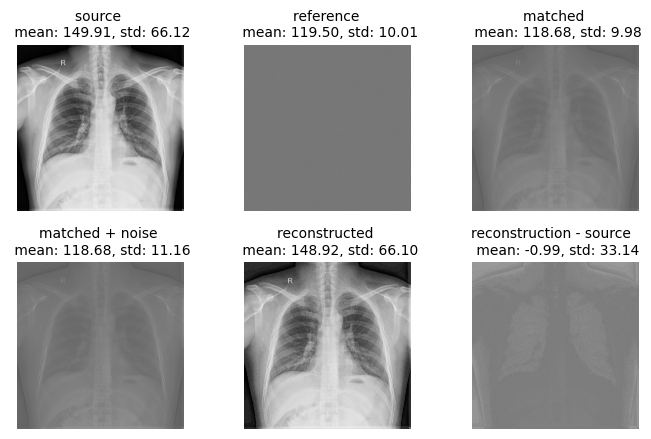

# real_image (train) / normal distribution / Poisson

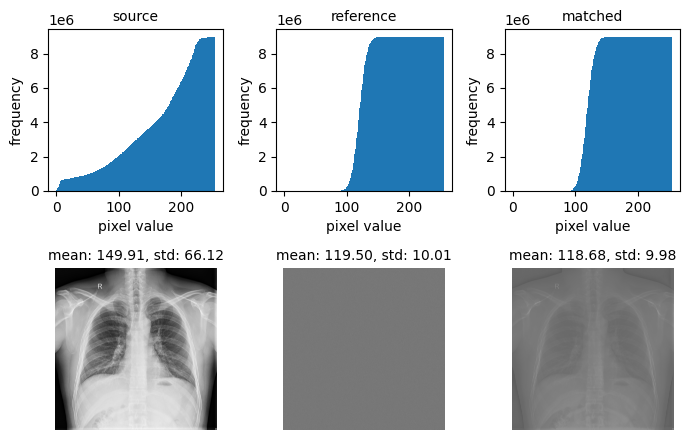

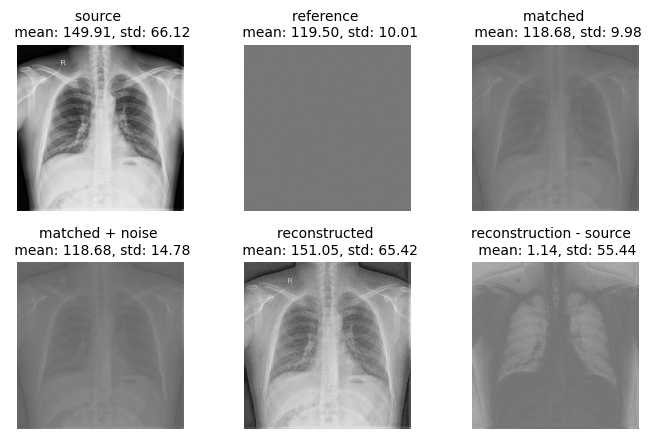

In [5]:
for source_name, source in sources.items():
    for reference_name, reference in references.items():
        for noise_name, noise in noises.items():
            display_markdown(f"# {source_name} / {reference_name} / {noise_name}", raw=True)
            matched = match_histograms(source, reference).astype(int)
            matched_noise = noise(matched)
            reconstructed = match_histograms(matched_noise, source).astype(int)
            fig = plot_histogram_matching(source, reference, matched)
            display(fig)
            fig.savefig(outs["histogram-matching"]+f"/matching_{source_name}-{reference_name}-{noise_name}.svg")
            fig.savefig(outs["histogram-matching"]+f"/matching_{source_name}-{reference_name}-{noise_name}.jpg")
            fig = plot_histogram_matching(source, reference, matched, matched_noise, reconstructed, reconstructed-source)
            display(fig)
            fig.savefig(outs["histogram-matching"]+f"/reconstruction_{source_name}-{reference_name}-{noise_name}.svg")
            fig.savefig(outs["histogram-matching"]+f"/reconstruction_{source_name}-{reference_name}-{noise_name}.jpg")